# Modeling

In [1]:
import sys

print(sys.version)  # Verify Python version is between 3.11-3.12

3.12.12 (main, Jan 14 2026, 23:36:32) [Clang 21.1.4 ]


In [2]:
import pandas as pd

print("Loading Data ...\n")
folder_path = "/Users/johnydc/Downloads/Tigers"  # Change this depending on your system path
stats = pd.read_csv(folder_path + "/data/raw/stats.csv")
stats = stats.rename(columns={"last_name, first_name": "name", "player_age": "age"})
stats

Loading Data ...



,name,player_id,year,age,ab,pa,home_run,strikeout,walk,k_percent,...,vertical_swing_path,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,"Pujols, Albert",405395,2021,41,275,296,17,45,14,15.2,...,NaN,90.3,12.0,29.3,9.1,39.7,100.714356,94.638800,21.7,47.1
1,"Cabrera, Miguel",408234,2021,38,472,526,15,118,40,22.4,...,NaN,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,25.8,49.4
2,"Molina, Yadier",425877,2021,38,440,473,11,79,24,16.7,...,NaN,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,24.0,57.1
3,"Suzuki, Kurt",435559,2021,37,219,247,6,44,12,17.8,...,NaN,85.2,14.6,28.9,3.9,27.2,95.984336,91.998129,21.7,49.0
4,"Cruz, Nelson",443558,2021,40,513,584,32,126,51,21.6,...,NaN,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,30.7,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,"Keaschall, Luke",807712,2025,22,182,207,4,29,19,14.0,...,35.6,86.2,10.5,38.3,5.2,31.2,97.107229,92.654309,18.5,42.0
1791,"Shaw, Matt",807713,2025,23,393,437,13,94,38,21.5,...,26.8,84.9,13.4,35.3,6.9,29.4,96.793366,92.432073,22.5,48.0
1792,"Yoshida, Masataka",807799,2025,31,188,205,4,24,10,11.7,...,32.8,90.2,5.7,29.2,6.5,44.0,100.498389,94.589775,15.4,44.5
1793,"Lee, Jung Hoo",808982,2025,26,560,617,8,71,47,11.5,...,39.4,87.1,9.9,34.1,3.7,32.0,97.154749,92.638544,13.1,44.7


## Building the Model

In [3]:
folder_path = "/Users/johnydc/Downloads/Tigers/"
processed_data = folder_path + "data/processed/"

In [4]:
import numpy as np
import pandas as pd

X_train = np.load(processed_data + 'train:val:test/X_train.npy')
y_train = np.load(processed_data + 'train:val:test/y_train.npy')
X_val = np.load(processed_data + 'train:val:test/X_val.npy')
y_val = np.load(processed_data + 'train:val:test/y_val.npy')
X_test = np.load(processed_data + 'train:val:test/X_test.npy')

X_train_val_indices = np.load(processed_data + 'train:val:test/X_train_val_indices.npy')
y_train_val_indices = np.load(processed_data + 'train:val:test/y_train_val_indices.npy')
train_idx = np.load(processed_data + 'train:val:test/train_idx.npy')
val_idx = np.load(processed_data + 'train:val:test/val_idx.npy')

# Converting our data to floats for the model input 
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_test = X_test.astype(np.float32)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reshaping the data into 2D for the scaler; then reshaping back to its original shape for the model
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, Masking
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Masking(mask_value=0.0),
    LSTM(8),
    Dense(8),
    Dense(1, 'linear')
])

In [7]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(X_train_scaled, y_train, epochs=15, validation_data=(X_val_scaled, y_val))

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 338.4008 - val_loss: 246.8696
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 277.3674 - val_loss: 183.6730
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215.7623 - val_loss: 125.9183
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 161.2544 - val_loss: 79.5084
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124.2616 - val_loss: 58.5278
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.5844 - val_loss: 55.7621
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 105.4808 - val_loss: 52.8410
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.0418 - val_loss: 42.4679
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.7237 - val_loss: 39.1235
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.3639 - val_loss: 40.4756
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.0303 - val_loss: 40.8249
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.451

In [8]:
y_pred = model.predict(X_val_scaled)
y_pred = y_pred.flatten()
y_pred = np.round(y_pred)

val_names = []
val_indices = X_train_val_indices[val_idx]
for index in val_indices:
    count = 0
    for i in range(4):
        if index[i] == -1:
            count += 1
        else:
            break
    name = stats.loc[index[count], 'name']
    val_names.append(name)

d = {"Name": val_names, "Actual Home Runs": y_val, "Predicted Home Runs": y_pred}
comparison = pd.DataFrame(data=d)
comparison.to_csv(folder_path + "/results/predictions/val_pred.csv", index=False)
comparison

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


,Name,Actual Home Runs,Predicted Home Runs
0,"Stanton, Giancarlo",24.0,26.0
1,"Flores, Wilmer",16.0,10.0
2,"Arenado, Nolan",12.0,16.0
3,"Contreras, Willson",20.0,19.0
4,"Bell, Josh",22.0,18.0
5,"Ward, Taylor",36.0,22.0
6,"Conforto, Michael",12.0,22.0
7,"Heim, Jonah",11.0,11.0
8,"Torres, Gleyber",16.0,17.0
9,"Díaz, Yandy",25.0,19.0


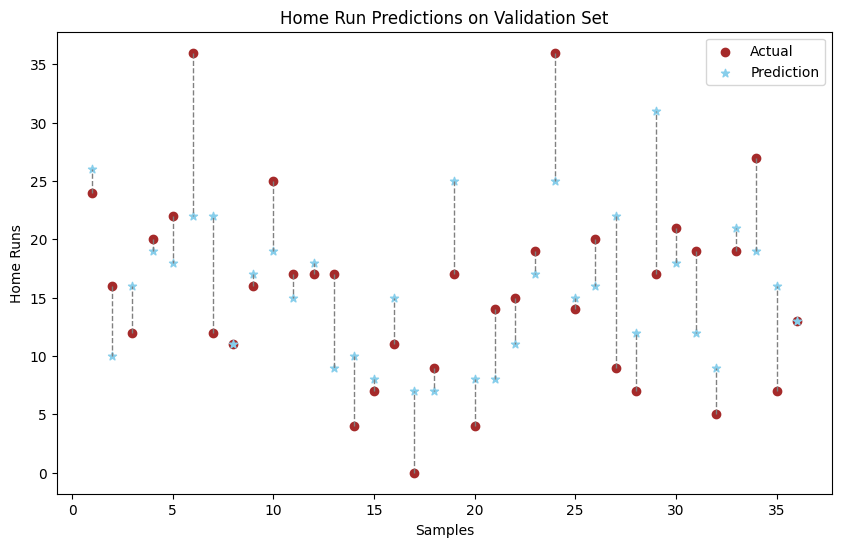

In [9]:
import matplotlib.pyplot as plt

val_samples = np.arange(1, len(y_val)+1)

plt.figure(figsize=(10, 6))
plt.title("Home Run Predictions on Validation Set")
plt.xlabel("Samples")
plt.ylabel("Home Runs")

plt.scatter(val_samples, y_val, color="brown", label="Actual")
plt.scatter(val_samples, y_pred, color="skyblue", marker="*", label="Prediction")

# Plot the residual line between the two data points
for x, y_true, y_hat in zip(val_samples, y_val, y_pred):
    plt.plot([x, x], [y_true, y_hat], color='gray', linestyle='--', linewidth=1)
    
plt.legend()
plt.savefig(folder_path + "results/figures/residuals.png")
plt.show()

In [10]:
tigers = ['Javier Báez', 'Kerry Carpenter', 'Dillon Dingler', 'Riley Greene', 'Colt Keith',
         'Justyn Henry Malloy', 'Zach Mckinstry', 'Parker Meadows', 'Wenceel Pérez',
         'Jake Rogers', 'Spencer Torkelson', 'Gleyber Torres', 'Matt Vierling']

tigers_pred = model.predict(X_test_scaled)
tigers_pred = tigers_pred.flatten()
tigers_pred = np.round(tigers_pred)

dtown = {"Detroit Tiger": tigers, "Predicted Home Runs": tigers_pred}
projections = pd.DataFrame(data=dtown)
projections.to_csv(folder_path + "/results/predictions/tigers_pred.csv", index=False)
projections

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


,Detroit Tiger,Predicted Home Runs
0,Javier Báez,9.0
1,Kerry Carpenter,21.0
2,Dillon Dingler,15.0
3,Riley Greene,26.0
4,Colt Keith,14.0
5,Justyn Henry Malloy,11.0
6,Zach Mckinstry,10.0
7,Parker Meadows,9.0
8,Wenceel Pérez,12.0
9,Jake Rogers,11.0
